<a href="https://colab.research.google.com/github/NoelMFM/FORECASTING-CON-RED-LSTM-/blob/main/TFG_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Carga de datos


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Se calgan los datos de excel a colab con la libreria Pandas
datos = pd.read_excel('TFG_Datos.xlsx', usecols=['Fecha', 'P','G(i)','H_sun','T2m','WS10m','Int'])

print(datos)

                  Fecha    P  G(i)  H_sun   T2m  WS10m  Int
0      2017-01-01 00:01  0.0   0.0    0.0  4.59   2.07  0.0
1      2017-01-01 01:01  0.0   0.0    0.0  4.57   2.07  0.0
2      2017-01-01 02:01  0.0   0.0    0.0  4.76   1.93  0.0
3      2017-01-01 03:01  0.0   0.0    0.0  5.34   1.79  0.0
4      2017-01-01 04:01  0.0   0.0    0.0  5.09   1.79  0.0
...                 ...  ...   ...    ...   ...    ...  ...
35059  2020-12-31 19:01  0.0   0.0    0.0  7.86   4.34  0.0
35060  2020-12-31 20:01  0.0   0.0    0.0  7.75   3.79  0.0
35061  2020-12-31 21:01  0.0   0.0    0.0  7.69   3.24  0.0
35062  2020-12-31 22:01  0.0   0.0    0.0  7.66   3.03  0.0
35063  2020-12-31 23:01  0.0   0.0    0.0  7.54   3.59  0.0

[35064 rows x 7 columns]


In [ ]:
#Se pasa al fecha al formato Datetime y se usa el metodo ffill para completar datos faltantes

datos['Fecha'] = pd.to_datetime(datos['Fecha'], format='%Y-%m-%d %H:%M')
datos = datos.set_index('Fecha')
datos = datos.asfreq('H', method='ffill')
datos = datos.sort_index()
datos.head()

,P,G(i),H_sun,T2m,WS10m,Int
Fecha,,,,,,
2017-01-01 00:01:00,0.0,0.0,0.0,4.59,2.07,0.0
2017-01-01 01:01:00,0.0,0.0,0.0,4.57,2.07,0.0
2017-01-01 02:01:00,0.0,0.0,0.0,4.76,1.93,0.0
2017-01-01 03:01:00,0.0,0.0,0.0,5.34,1.79,0.0
2017-01-01 04:01:00,0.0,0.0,0.0,5.09,1.79,0.0


In [ ]:
#Cuantos datos de potencia se tiene, para comprobar que se cargaron todos
print(datos.index[0])             # Primer elemento
print(datos.index[-1])            # Último elemento
print(datos.index[-1]-datos.index[0])# Diferencia

2017-01-01 00:01:00
2020-12-31 23:01:00
1460 days 23:00:00


##2.  Transformada de Fourier

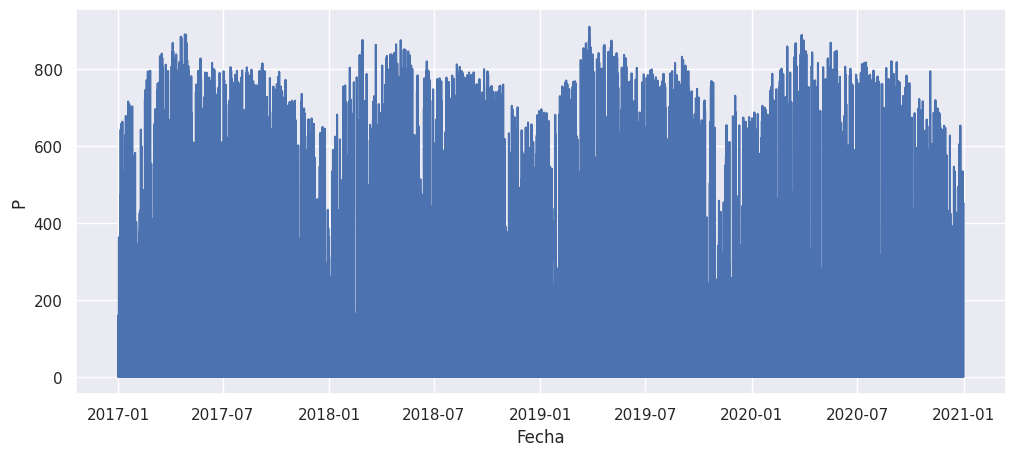

In [ ]:
import seaborn as sns
sns.set()
#Se plotean los datos de potencia de los 4 años
Pot=datos['P']

fig,ax=plt.subplots(figsize=(12,5))
sns.lineplot(Pot, ax=ax);

In [ ]:
import plotly.express as px

Muestras=len(Pot)
Muestras_hora=1
#transformada de fourier
tf=abs(np.fft.rfft(Pot,Muestras))
#Vector Frecuencias, eje hor
frec=np.fft.rfftfreq(Muestras,d=1./Muestras_hora)
#Grafica
fig=px.line(x=frec,y=tf,log_x=True)
fig.update_layout(xaxis_title=f'Frecuencia (1/hora)')
fig.show()

In [ ]:
frec1=0.04166667
frec2=0.0833333
frec3=114.0771e-6
print(f'La frecuencia 1 de {frec1} equivale {1/frec1} a horas')
print(f'La frecuencia 2 de {frec2} equivale {1/frec2} a horas')
print(f'La frecuencia 3 de {frec3} equivale {1/frec3} a horas, es decir {1/frec3/24/365.25} años')

La frecuencia 1 de 0.04166667 equivale 23.99999808000015 a horas
La frecuencia 2 de 0.0833333 equivale 12.00000480000192 a horas
La frecuencia 3 de 0.0001140771 equivale 8766.001239512574 a horas, es decir 1.00000014140002 años


In [ ]:
# Extraer la hora y el mes del índice
datos['hora'] = datos.index.hour
datos['mes'] = datos.index.month
print(datos)

                       P  G(i)  H_sun   T2m  WS10m  Int  hora  mes
Fecha                                                             
2017-01-01 00:01:00  0.0   0.0    0.0  4.59   2.07  0.0     0    1
2017-01-01 01:01:00  0.0   0.0    0.0  4.57   2.07  0.0     1    1
2017-01-01 02:01:00  0.0   0.0    0.0  4.76   1.93  0.0     2    1
2017-01-01 03:01:00  0.0   0.0    0.0  5.34   1.79  0.0     3    1
2017-01-01 04:01:00  0.0   0.0    0.0  5.09   1.79  0.0     4    1
...                  ...   ...    ...   ...    ...  ...   ...  ...
2020-12-31 19:01:00  0.0   0.0    0.0  7.86   4.34  0.0    19   12
2020-12-31 20:01:00  0.0   0.0    0.0  7.75   3.79  0.0    20   12
2020-12-31 21:01:00  0.0   0.0    0.0  7.69   3.24  0.0    21   12
2020-12-31 22:01:00  0.0   0.0    0.0  7.66   3.03  0.0    22   12
2020-12-31 23:01:00  0.0   0.0    0.0  7.54   3.59  0.0    23   12

[35064 rows x 8 columns]


In [ ]:
#El índice antiguo se convierte en una columna en el DataFrame
datos=datos.reset_index()
datos=datos.drop(columns=['Fecha'])
datos

,P,G(i),H_sun,T2m,WS10m,Int,hora,mes
0,0.0,0.0,0.0,4.59,2.07,0.0,0,1
1,0.0,0.0,0.0,4.57,2.07,0.0,1,1
2,0.0,0.0,0.0,4.76,1.93,0.0,2,1
3,0.0,0.0,0.0,5.34,1.79,0.0,3,1
4,0.0,0.0,0.0,5.09,1.79,0.0,4,1
...,...,...,...,...,...,...,...,...
35059,0.0,0.0,0.0,7.86,4.34,0.0,19,12
35060,0.0,0.0,0.0,7.75,3.79,0.0,20,12
35061,0.0,0.0,0.0,7.69,3.24,0.0,21,12
35062,0.0,0.0,0.0,7.66,3.03,0.0,22,12


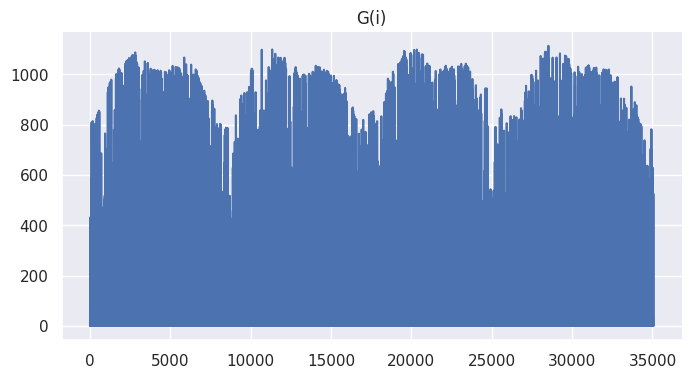

In [ ]:
# @title G(i)

from matplotlib import pyplot as plt
datos['G(i)'].plot(kind='line', figsize=(8, 4), title='G(i)')
plt.gca().spines[['top', 'right']].set_visible(False)

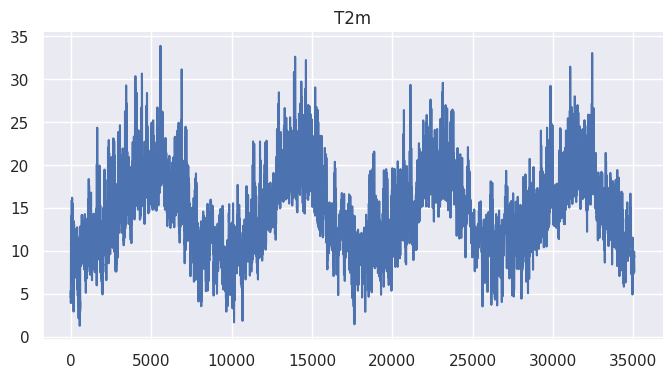

In [ ]:
# @title T2m

from matplotlib import pyplot as plt
datos['T2m'].plot(kind='line', figsize=(8, 4), title='T2m')
plt.gca().spines[['top', 'right']].set_visible(False)

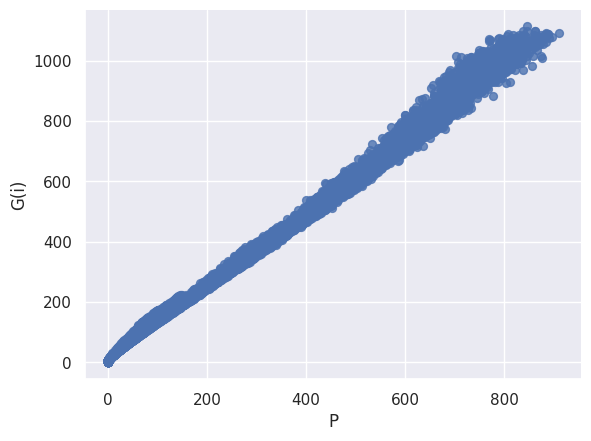

In [ ]:
# @title P vs G(i)

from matplotlib import pyplot as plt
datos.plot(kind='scatter', x='P', y='G(i)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

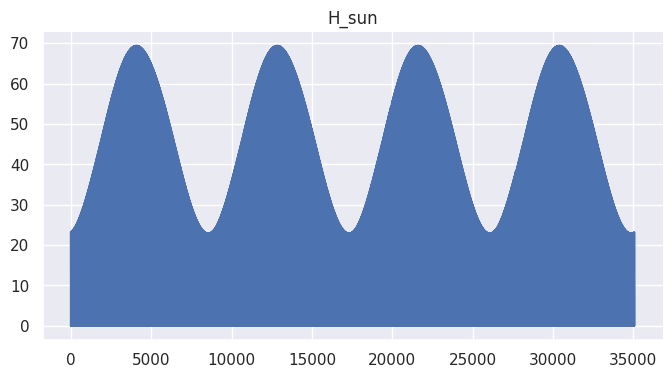

In [ ]:
# @title H_sun

from matplotlib import pyplot as plt
datos['H_sun'].plot(kind='line', figsize=(8, 4), title='H_sun')
plt.gca().spines[['top', 'right']].set_visible(False)

##3.  División de los datos

In [ ]:
# Función para generar las particiones

def train_val_test_split(dataframe, tr_size=0.8, vl_size=0.1, ts_size=0.1 ):
    # Definir número de datos en cada subserie
    N = dataframe.shape[0]
    Ntrain = int(tr_size*N)  # Número de datos de entrenamiento
    Nval = int(vl_size*N)    # Número de datos de validación
    Ntst = N - Ntrain - Nval # Número de datos de prueba

    # Realizar partición
    train = dataframe[0:Ntrain]
    val = dataframe[Ntrain:Ntrain+Nval]
    test = dataframe[Ntrain+Nval:]

    return train, val, test

#Llama a al función
entrenamiento, validacion, prueba = train_val_test_split(datos)

print(f'Tamaño set de entrenamiento: {entrenamiento.shape}')
print(f'Tamaño set de validación: {validacion.shape}')
print(f'Tamaño set de prueba: {prueba.shape}')

Tamaño set de entrenamiento: (28051, 8)
Tamaño set de validación: (3506, 8)
Tamaño set de prueba: (3507, 8)


##4.  Escalado de los datos

In [ ]:
from sklearn.preprocessing import StandardScaler

def escalar_dataset(data_train,data_validation,data_test, col_ref):
    '''Escala el dataset utilizando StandardScaler.

    Entradas:
    - data_input: Los dataset de entrada y salida del modelo

    - col_ref: parámetro adicional para especificar la columna que contiene
      la variable a predecir


    Retorna:
    - data_scaled: diccionario con los datasets de entrada y salida escalados
      (tiene la misma estructura que a la entrada)
    - scaler: el escalador usado (requerido para las predicciones)
    '''

       # Número de instantes de tiempo de entrada y de covariables
    NFEATS = data_train.shape[1]

    # Generar listado con "scalers", 1 por cada covariable de entrada
    scalers = [StandardScaler() for _ in range(NFEATS)]

    # Escalamiento: se usarán todo los parámetros para escalar
    # Escalamiento de los valores de train,val y test
    datos_t = np.zeros(data_train.shape)
    datos_v = np.zeros(data_validation.shape)
    datos_ts = np.zeros(data_test.shape)

    for i, scaler in enumerate(scalers):
 # Escalar datos de entrenamiento
        datos_i = data_train.iloc[:, i].values.reshape(-1, 1)
        datos_t[:, i] = scaler.fit_transform(datos_i).flatten()

        # Escalar datos de validación
        datos_j = data_validation.iloc[:, i].values.reshape(-1, 1)
        datos_v[:, i] = scaler.transform(datos_j).flatten()

        # Escalar datos de prueba
        datos_k = data_test.iloc[:, i].values.reshape(-1, 1)
        datos_ts[:, i] = scaler.transform(datos_k).flatten()

    return datos_t,datos_v,datos_ts, scalers[data_train.columns.get_loc(col_ref)]

In [ ]:
# Escalar el dataset con la función anterior
tr, vl, ts, scaler = escalar_dataset(entrenamiento, validacion, prueba, col_ref='P')

# Convertir los resultados a DataFrame
tr = pd.DataFrame(tr, columns=list(datos.columns.values))
vl = pd.DataFrame(vl, columns=list(datos.columns.values))
ts = pd.DataFrame(ts, columns=list(datos.columns.values))


##5.  Crear Matrices

In [ ]:
def crear_dataset_supervisado(array, input_length, output_length):
    '''Permite crear un dataset con las entradas (X) y salidas (Y)
    requeridas por la Red LSTM.

    Parámetros:
    - Cadena: Matriz numpy de tamaño N x f (N: cantidad de datos,
      f: cantidad de covariables)
    - Longitud de entrada: instantes de tiempo consecutivos de la serie de tiempo
      usada para alimentar el modelo
    - Longitud de salida: instantes de tiempo a pronosticar (salida del modelo)
    '''

    # Inicialización
    X, Y = [], []    # Matrices que contendrán los datos de entrada y salida del modelo
    fils, cols = array.shape # Se realiza de esta forma porque se tienen vairas series (multivariado)

    # Generar las matrices
    for i in range(fils-input_length-output_length):
        # Entrada al modelo
        X.append(array[i:i+INPUT_LENGTH,0:cols])

        # Salida (el índice 0 corresponde a la columna con la variable a predecir)
        Y.append(array[i+input_length:i+input_length+output_length,0].reshape(output_length,1))

    # Convertir matrices a arreglos de NumPy
    X = np.array(X)
    Y = np.array(Y)

    return X, Y

In [ ]:
# Crear los datasets de entrenamiento, prueba y validación y verificar sus tamaños
INPUT_LENGTH = 24    # Hiperparámetro
OUTPUT_LENGTH = 2    # Modelo multi-step

x_tr, y_tr = crear_dataset_supervisado(tr.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_vl, y_vl = crear_dataset_supervisado(vl.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_ts, y_ts = crear_dataset_supervisado(ts.values, INPUT_LENGTH, OUTPUT_LENGTH)

# Imprimir información en pantalla
print('Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)')
print(f'Set de entrenamiento - x_tr: {x_tr.shape}, y_tr: {y_tr.shape}')
print(f'Set de validación - x_vl: {x_vl.shape}, y_vl: {y_vl.shape}')
print(f'Set de prueba - x_ts: {x_ts.shape}, y_ts: {y_ts.shape}')

Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)
Set de entrenamiento - x_tr: (28025, 24, 8), y_tr: (28025, 2, 1)
Set de validación - x_vl: (3480, 24, 8), y_vl: (3480, 2, 1)
Set de prueba - x_ts: (3481, 24, 8), y_ts: (3481, 2, 1)


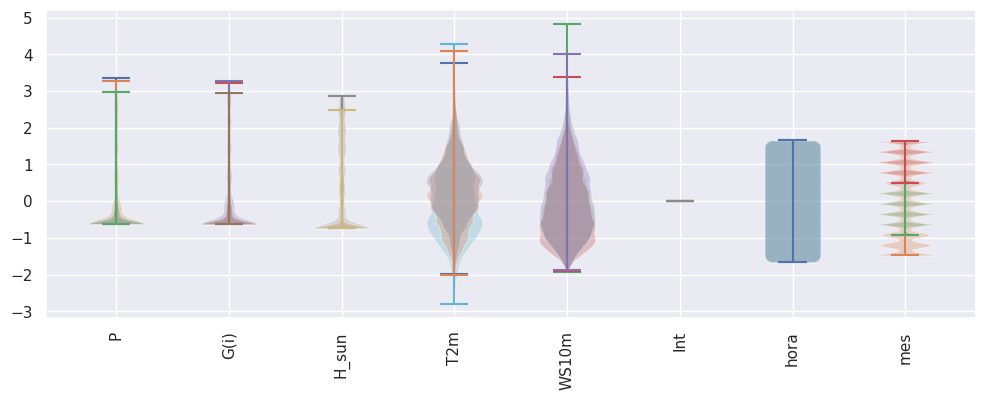

In [ ]:
# Se genera una gráfica tipo violín para ver la distribución
# de los valores en cada covariable (entrada) y en la variable a
# predecir (salida)

fig, ax = plt.subplots(figsize=(12,4))
for i in range(8):
    ax.violinplot(dataset=x_tr[:,:,i].flatten(), positions=[i])
    ax.violinplot(dataset=x_vl[:,:,i].flatten(), positions=[i])
    ax.violinplot(dataset=x_ts[:,:,i].flatten(), positions=[i])

# Etiquetas eje horizontal
ax.set_xticks(list(range(8)))
ax.set_xticklabels(datos.keys(), rotation=90)
ax.autoscale();

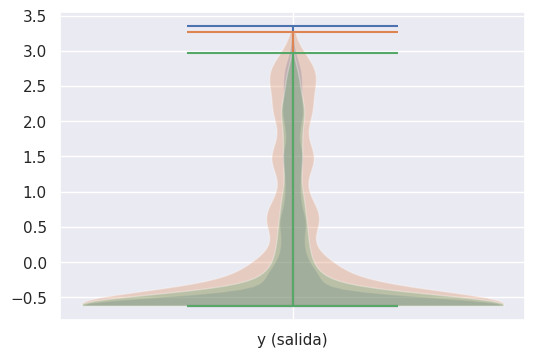

In [ ]:
# Y se hace lo mismo con la variable de salida:
fig, ax = plt.subplots(figsize=(6,4))
ax.violinplot(dataset=y_tr.flatten())
ax.violinplot(dataset=y_vl.flatten())
ax.violinplot(dataset=y_ts.flatten())
ax.set_xticks([1])
ax.set_xticklabels(['y (salida)']);

##6.  Modelo

In [ ]:
# Creación del modelo(sin tensorboard)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf
import os
import datetime

tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()

# El modelo
N_UNITS = 60  # Neuronas
INPUT_SHAPE = (x_tr.shape[1], x_tr.shape[2])  # 24 (horas) x 8 (variables)
OUTPUT_LENGTH = 2  # Asegúrate de definir esto de acuerdo a tu problema

modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE))
modelo.add(Dropout(0.2))  # Regularización Dropout
modelo.add(Dense(OUTPUT_LENGTH, activation='linear'))  # activation = 'linear' pues queremos pronosticar (regresión)

# Compilación
modelo.compile(
    loss='mse',
    optimizer=Adam(learning_rate=1e-4),  # Optimizer Adam con learning rate = 1e-4
    metrics=['mse', 'mae', 'mape']
)


from tensorflow.keras.callbacks import EarlyStopping

# Definir el callback de EarlyStopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenamiento (aproximadamente 1 min usando GPU)
BATCH_SIZE = 128  # Hiperparámetro
EPOCHS=200  #Iteraciones Maximas
historia = modelo.fit(
    x=x_tr,
    y=y_tr,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_vl, y_vl),
    callbacks=[early_stopping_callback],  # Añadir el callback de EarlyStopping
    verbose=2,
)



Epoch 1/200
219/219 - 6s - loss: 0.7475 - mse: 0.7475 - mae: 0.6466 - mape: 137.2537 - val_loss: 0.5239 - val_mse: 0.5239 - val_mae: 0.5213 - val_mape: 249.0600 - 6s/epoch - 27ms/step
Epoch 2/200
219/219 - 1s - loss: 0.3506 - mse: 0.3506 - mae: 0.4386 - mape: 180.7065 - val_loss: 0.2570 - val_mse: 0.2570 - val_mae: 0.3631 - val_mape: 225.3911 - 1s/epoch - 5ms/step
Epoch 3/200
219/219 - 1s - loss: 0.2317 - mse: 0.2317 - mae: 0.3395 - mape: 154.5734 - val_loss: 0.1916 - val_mse: 0.1916 - val_mae: 0.2825 - val_mape: 179.6313 - 1s/epoch - 5ms/step
Epoch 4/200
219/219 - 1s - loss: 0.1965 - mse: 0.1965 - mae: 0.2985 - mape: 143.3188 - val_loss: 0.1755 - val_mse: 0.1755 - val_mae: 0.2576 - val_mape: 165.5648 - 1s/epoch - 6ms/step
Epoch 5/200
219/219 - 1s - loss: 0.1818 - mse: 0.1818 - mae: 0.2818 - mape: 141.5775 - val_loss: 0.1613 - val_mse: 0.1613 - val_mae: 0.2394 - val_mape: 173.5242 - 1s/epoch - 7ms/step
Epoch 6/200
219/219 - 2s - loss: 0.1737 - mse: 0.1737 - mae: 0.2716 - mape: 145.0710

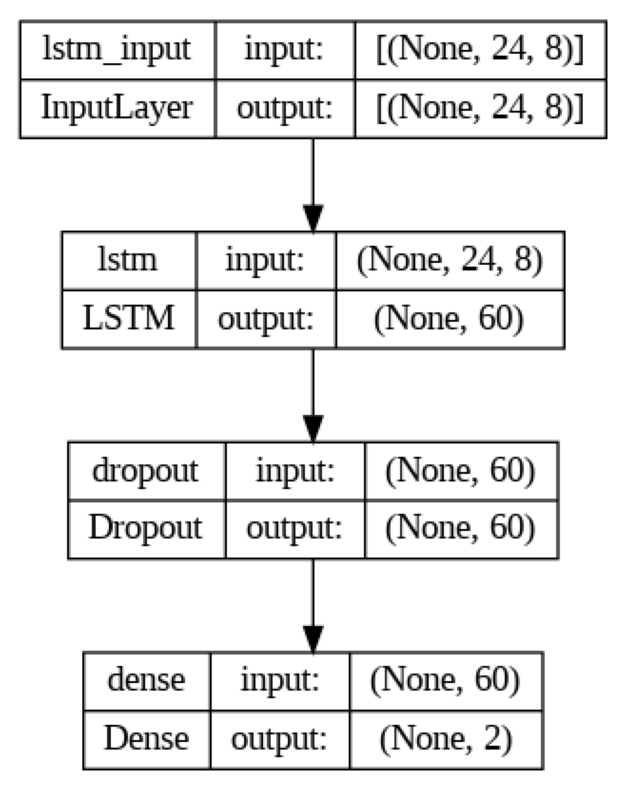

In [ ]:
# Visualizar el modelo
#!pip install pydot pydot-ng graphviz
#!pip install pydot

from tensorflow.keras.utils import plot_model

# Guardar la figura del modelo como un archivo de imagen
ruta = "TFG\\model_plot.png"
plot_model(modelo, to_file=ruta, show_shapes=True, show_layer_names=True)

# Mostrar la imagen del modelo directamente en el notebook
img = plt.imread(ruta)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

##7.  Validación del modelo

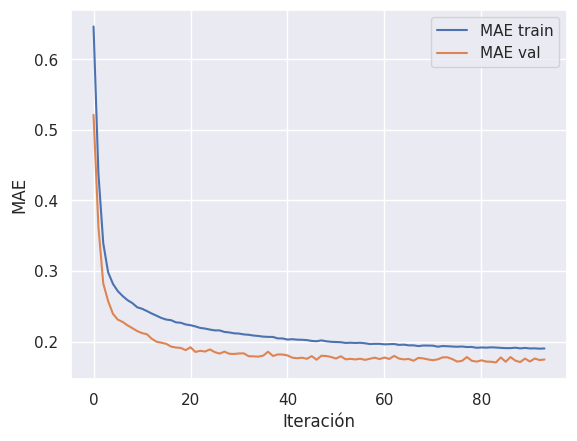

In [ ]:
plt.plot(historia.history['mae'],label='MAE train')
plt.plot(historia.history['val_mae'],label='MAE val')

plt.xlabel('Iteración')
plt.ylabel('MAE')
plt.legend();

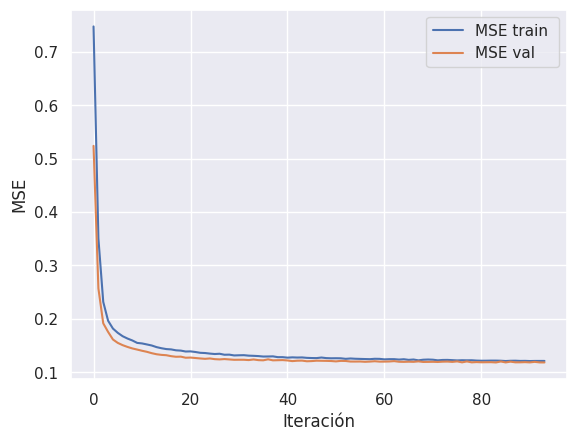

In [ ]:
plt.plot(historia.history['mse'],label='MSE train ')
plt.plot(historia.history['val_mse'],label='MSE val ')
plt.xlabel('Iteración')
plt.ylabel('MSE')
plt.legend();

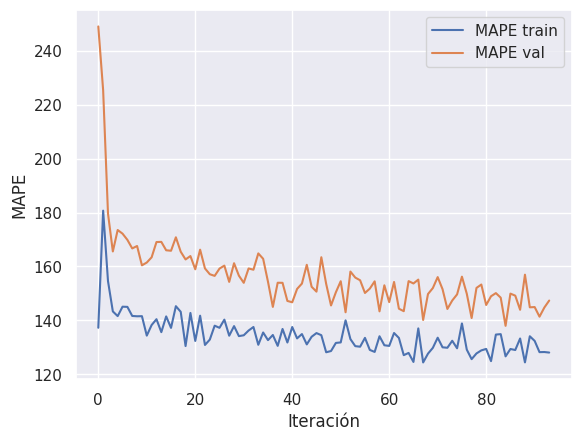

In [ ]:
plt.plot(historia.history['mape'],label='MAPE train')
plt.plot(historia.history['val_mape'],label='MAPE val')
plt.xlabel('Iteración')
plt.ylabel('MAPE')
plt.legend();

In [ ]:
def predecir(x, model, scaler):
    '''Genera la predicción de OUTPUT_LENGTH instantes
    de tiempo a futuro con el modelo entrenado.

    Entrada:
    - x: batch (o batches) de datos para ingresar al modelo
      (tamaño: BATCHES X INPUT_LENGTH X FEATURES)
    - model: Red LSTM entrenada
    - scaler: escalador (requerido para llevar la predicción a la escala original)

    Salida:
    - y_pred: la predicción en la escala original (tamaño: BATCHES X OUTPUT_LENGTH X FEATURES)
    '''

    # Calcular predicción escalada en el rango de -1 a 1
    y_pred_s = model.predict(x,verbose=0)

    # Llevar la predicción a la escala original
    y_pred = scaler.inverse_transform(y_pred_s)

    return y_pred.flatten()

In [ ]:
# Calcular predicciones sobre el set de prueba
y_ts_pred = predecir(x_ts, modelo, scaler)

y_real = scaler.inverse_transform(y_ts[:3480,1])
pred = np.array([])
a=len(y_ts_pred)
for i in range(round(a/2)):
  if i%2 == 0:
    pred= np.concatenate((pred, [y_ts_pred[i]]))

In [ ]:
hpredic=168
a=x_ts[:hpredic]
pred=predecir(a, modelo, scaler)
t1 = np.array([])  # Inicializar t1 como un array vacío
t2 = np.array([])  # Inicializar t2 como un array vacío

for i in range(hpredic*2):
  if i%2 == 0:
    t1= np.concatenate((t1, [pred[i]]))
  else:
    t2=np.concatenate((t2, [pred[i]]))

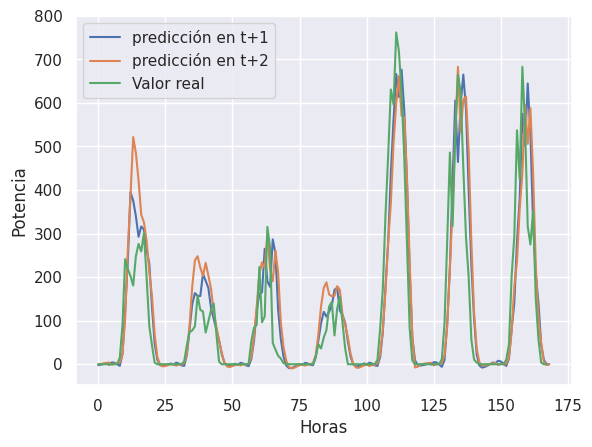

In [ ]:
 t1=np.concatenate((t1, [0]))
 t2=np.concatenate(([0], t2))
plt.plot(t1,label='predicción en t+1')
plt.plot(t2,label='predicción en t+2')
plt.plot(y_real[:hpredic],label='Valor real')
plt.xlabel('Horas')
plt.ylabel('Potencia')
plt.legend();

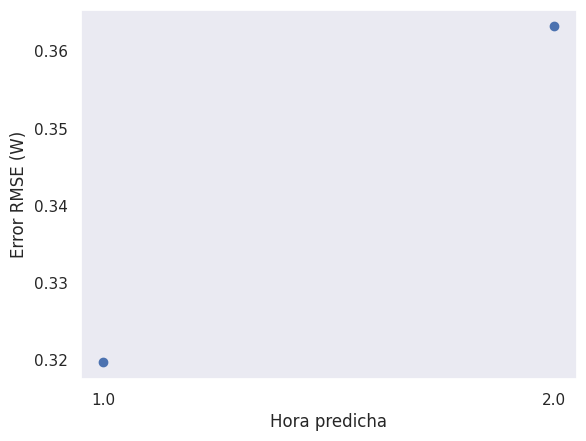

In [ ]:
# 1. Generar las predicciones sobre el set de prueba
y_ts_pred_s = modelo.predict(x_ts, verbose=0)

# 2. Realizar la transformación inversa de las predicciones para llevar sus
# valores a la escala original
y_ts_pred = (y_ts_pred_s )

# 3. Calcular RMSE para cada instante de tiempo predicho
diff_cuad = np.square(y_ts.squeeze()-y_ts_pred) # BATCHESx2
proms = np.mean(diff_cuad, axis=0) # 1x2
rmse = np.sqrt(proms) # 1x2

# Graficar rmse para cada timestep
t = np.linspace(1,2,2)

fig, ax = plt.subplots()
ax.scatter(t,rmse)
ax.set_xlabel('Hora predicha')
ax.set_ylabel('Error RMSE (W)')
plt.xticks(ticks=t, labels=t)
plt.grid();

##8. Pesos

###8.1  Método 1

In [ ]:
def nuevo_modelo( x_validacion, y_validacion, x_entrenamiento, y_entrenamiento,):
    x_entrenamiento = np.array(x_entrenamiento)
    x_validacion = np.array(x_validacion)
    INPUT_SHAPE = (x_entrenamiento.shape[1], x_entrenamiento.shape[2])  # 24 (horas) x 9 (features)

    tf.random.set_seed(123)
    tf.config.experimental.enable_op_determinism()

    # El modelo
    N_UNITS = 60  # Neuronas
    OUTPUT_LENGTH = 2  # Asegúrate de definir esto de acuerdo a tu problema

    modelo_2 = Sequential()
    modelo_2.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE))
    modelo_2.add(Dropout(0.2))  # Regularización Dropout
    modelo_2.add(Dense(OUTPUT_LENGTH, activation='linear'))  # activation = 'linear' pues queremos pronosticar (regresión)

    # Compilación
    modelo_2.compile(
        loss='mse',
        optimizer=Adam(learning_rate=1e-4),  # Optimizer Adam con learning rate = 1e-4
        metrics=['mse', 'mae', 'mape']
    )


    from tensorflow.keras.callbacks import EarlyStopping

    # Definir el callback de EarlyStopping
    early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Entrenamiento (aproximadamente 1 min usando GPU)
    BATCH_SIZE = 128  # Hiperparámetro
    EPOCHS=200
    historia = modelo_2.fit(
        x=x_entrenamiento,
        y=y_entrenamiento,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,  # Maximas
        validation_data=(x_validacion, y_validacion),
        callbacks=[early_stopping_callback],  # Añadir el callback de EarlyStopping
        verbose=2,
    )
    mse_perm = modelo_2.evaluate(x_validacion, y_validacion, verbose=0)
    return mse_perm

In [ ]:
def pfi_modelo(model, x_val, y_val, cols,x_trn,y_trn):
    '''Calcula la métrica "permutation feature importance"
    del modelo.

    Entradas:
    - model: modelo entrenado
    - x: arreglo de entradas (características)
    - y: arreglo de targets (salidas de referencia)
    - cols: nombres de las columnas en el set de datos original

    Retorna:
    - DataFrame con los features importances

    '''
    NFEATS = x_trn.shape[2] # Número de columnas del arreglo de entradas (8)

    # Arreglo que contendrá los PFIs calculados
    resultados = []

    # 1. Estimar el error original del modelo entrenado
    mse_orig = model.evaluate(x_val, y_val, verbose = 0)

    # 2. Iterar sobre cada columna y para cada iteración:
    # 2.1. Permutar la columna
    # 2.2. Calcular rmse_perm
    # 2.3. Calcular pfi = rmse_perm/rmse_orig
    # 2.4. Almacenar el resultado
    for k in range(NFEATS):
        print(f'\tCalculando feature_importance variable {k+1}/{NFEATS}')


        Datos_val = np.delete(x_val, k, axis=2)

        Datos_train =  np.delete(x_trn, k, axis=2)

        # Calcular rmse_perm
        mse_perm = nuevo_modelo(Datos_val, y_val,Datos_train,y_trn)

        # Calcular cociente (pfi)
        Resultados_finales = mse_perm[1]/mse_orig[1]

        # Almacenar en "resultados"
        resultados.append({'feature':cols[k],'feature_importance':Resultados_finales})


    # Crear DataFrame de Pandas a partir de "resultados"
    mse_final = pd.DataFrame(resultados).sort_values(by='feature_importance', ascending=False)

    return mse_final

In [ ]:
feat_imp = pfi_modelo(modelo,
                      x_vl,
                      y_vl,
                      datos.columns,
                      x_tr,
                      y_tr)
feat_imp

	Calculando feature_importance variable 1/8
Epoch 1/200
219/219 - 3s - loss: 0.7725 - mse: 0.7725 - mae: 0.6589 - mape: 124.3513 - val_loss: 0.5929 - val_mse: 0.5929 - val_mae: 0.5418 - val_mape: 214.0028 - 3s/epoch - 15ms/step
Epoch 2/200
219/219 - 1s - loss: 0.4013 - mse: 0.4013 - mae: 0.4705 - mape: 180.8785 - val_loss: 0.3046 - val_mse: 0.3046 - val_mae: 0.4041 - val_mape: 273.0308 - 1s/epoch - 5ms/step
Epoch 3/200
219/219 - 1s - loss: 0.2729 - mse: 0.2729 - mae: 0.3748 - mape: 178.6734 - val_loss: 0.2255 - val_mse: 0.2255 - val_mae: 0.3205 - val_mape: 228.1871 - 1s/epoch - 5ms/step
Epoch 4/200
219/219 - 1s - loss: 0.2215 - mse: 0.2215 - mae: 0.3225 - mape: 171.2534 - val_loss: 0.1951 - val_mse: 0.1951 - val_mae: 0.2807 - val_mape: 202.8199 - 969ms/epoch - 4ms/step
Epoch 5/200
219/219 - 1s - loss: 0.1982 - mse: 0.1982 - mae: 0.2967 - mape: 154.8466 - val_loss: 0.1759 - val_mse: 0.1759 - val_mae: 0.2511 - val_mape: 207.9124 - 962ms/epoch - 4ms/step
Epoch 6/200
219/219 - 1s - loss: 0

,feature,feature_importance
3,T2m,1.031802
1,G(i),1.018588
7,mes,1.017096
2,H_sun,1.016441
0,P,1.007464
6,hora,1.004385
5,Int,1.001766
4,WS10m,0.996639


from matplotlib import pyplot as plt
_df_0['feature_importance'].plot(kind='hist', bins=20, title='feature_importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('feature').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['feature_importance'].plot(kind='line', figsize=(8, 4), title='feature_importance')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['feature'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='feature_importance', y='feature', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

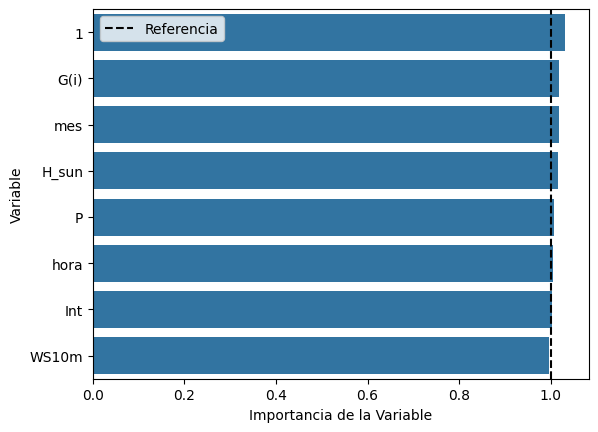

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico de barras
ax = sns.barplot(data=feat_imp, x='feature_importance', y='feature')

# Añadir una línea de referencia
ax.axvline(1.0, color='k', linestyle='--', label='Referencia')

# Añadir leyenda
ax.legend()

# Agregar nombres a los ejes
ax.set_xlabel('Importancia de la Variable')
ax.set_ylabel('Variable')

# Mostrar el gráfico
plt.show()

###8.2  Método 2

In [ ]:
def pfi_modelo_2(model, x, y, cols):
    '''Calcula la métrica "permutation feature importance"
    del modelo.

    Entradas:
    - model: modelo entrenado
    - x: arreglo de entradas (características)
    - y: arreglo de targets (salidas de referencia)
    - cols: nombres de las columnas en el set de datos original

    Retorna:
    - DataFrame con los features importances

    '''
    NFEATS = x.shape[2] # Número de columnas del arreglo de entradas (10)

    # Arreglo que contendrá los PFIs calculados
    resultados = []

    # 1. Estimar el error original del modelo entrenado
    mse_orig = model.evaluate(x, y, verbose = 0)

    # 2. Iterar sobre cada columna y para cada iteración:
    # 2.1. Permutar la columna
    # 2.2. Calcular rmse_perm
    # 2.3. Calcular pfi = rmse_perm/rmse_orig
    # 2.4. Almacenar el resultado
    for k in range(NFEATS):
        print(f'\tCalculando feature_importance variable {k+1}/{NFEATS}')

        # Permutar covariable k
        save_col = x[:,:,k].copy() # Extraer una copia de la columna
        np.random.shuffle(x[:,:,k]) # Permutarla aleatoriamente

        # Calcular rmse_perm
        mse_perm = model.evaluate(x, y, verbose=0)

        # Calcular cociente (pfi)
        pfi = mse_perm[1]/mse_orig[1]

        # Almacenar en "resultados"
        resultados.append({'feature':cols[k],'feature_importance':pfi})

        # Y restablecer la covariable a su posicion original (necesario
        # para la siguiente iteración)
        x[:,:,k] = save_col

    # Crear DataFrame de Pandas a partir de "resultados"
    pfis = pd.DataFrame(resultados).sort_values(by='feature_importance', ascending=False)

    return pfis

In [ ]:
feat_imp_2 = pfi_modelo_2(modelo,
                      x_vl,
                      y_vl,
                      datos.columns)
feat_imp_2

	Calculando feature_importance variable 1/8
	Calculando feature_importance variable 2/8
	Calculando feature_importance variable 3/8
	Calculando feature_importance variable 4/8
	Calculando feature_importance variable 5/8
	Calculando feature_importance variable 6/8
	Calculando feature_importance variable 7/8
	Calculando feature_importance variable 8/8


,feature,feature_importance
6,hora,9.024213
0,P,5.227767
1,G(i),4.345079
2,H_sun,1.505052
3,T2m,1.325656
7,mes,1.029992
4,WS10m,1.018229
5,Int,1.000000


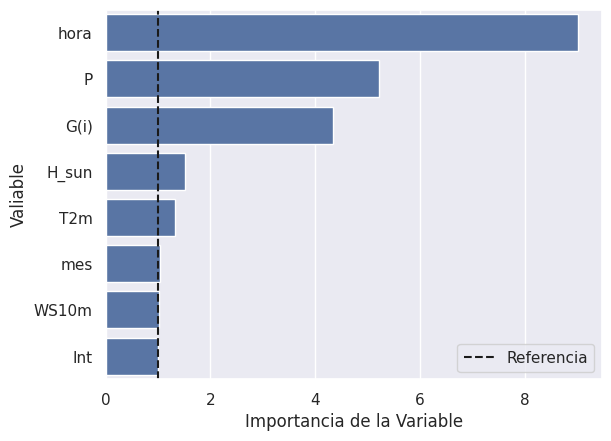

In [ ]:
# Crear el gráfico de barras
ax = sns.barplot(data=feat_imp_2, x='feature_importance', y='feature')

# Añadir una línea de referencia
ax.axvline(1.0, color='k', linestyle='--', label='Referencia')

# Añadir leyenda
ax.legend()

# Agregar nombres a los ejes
ax.set_xlabel('Importancia de la Variable')
ax.set_ylabel('Valiable')

# Mostrar el gráfico
plt.show()